<a href="https://colab.research.google.com/github/BxMild/Data-warehouse-2024/blob/main/Data_Analytics_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 2: Data Analytics and Modeling

<img src="https://datarundown.com/wp-content/uploads/2023/05/Model-Data-Analytics.jpg" width="400px">

ชื่อกลุ่ม: Moo

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. ปีย์รดา ภู่ถนนนอก
2. พรชนิตว์ เหล่าโยธี
3. นิธินันต์ ศรีกงพาน

กำหนดส่ง: พุธ 9 ตุลาคม 2567  

รายงานในชั้นเรียน: พฤหัสบดี 10 ตุลาคม 2567

** NOTE **
* อย่าลืมบันทึกงานที่ทำในโน้ตบุ๊คนี้เป็นประจำขณะทำงาน มิเช่นนั้นงานที่ทำอยู่อาจสูญหายได้
* **เริ่มทำแต่เนิ่น ๆ อย่ารอที่จะทำก่อนส่ง เพราะจะทำไม่เสร็จ เนื่องจากปัญหามากมายที่จะเกิดขึ้นระหว่างการทำงาน และอาจารย์ไม่รับปรึกษาในคืนก่อนส่ง**
----------------------

### เลือกชุดข้อมูล 1 ชุดจากข้อมูลที่กำหนดให้ต่อไปนี้
* <b>MovieLens 1M Data Set<b>
    * ข้อมูลชุดนี้มีข้อมูลเกี่ยวกับ movies, users, และ how they rate the movies
    * สามารถดูรายละเอียดได้ที่ http://grouplens.org/datasets/movielens/
    * Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/
    * Merge all of the data into a single Pandas DataFrame. See
        * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
    
* <b>Walmart_Sales_Forecast<b>
    * สามารถดูรายละเอียดได้ที่ https://github.com/Asikpalysik/Walmart_Sales_Forecast/tree/main
    * ข้อมูลประกอบด้วยไฟล์ features.csv, stores.csv และ ข้อมูลยอดขาย (train.csv และ test.csv)
    * ให้ใช้ข้อมูลจากทุกไฟล์ทุกอย่างประกอบกันในการวิเคราะห์
    
* <b>NYC Taxi Trips<b>
    * ข้อมูลทริปของแท็กซี่ในเมืองนิวยอร์กจาก https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
    * ข้อมูลเก็บโดย The NYC Taxi and Limousine Commission (TLC) ประกอบด้วย pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts
    * นอกจากไฟล์ข้อมูลทริปของแท็กซี่แล้ว ยังมีข้อมูลเกี่ยวกับ zone ของพื้นที่ที่ให้บริการ และคำอธิบายข้อมูลในส่วนล่างสุดของหน้าเดียวกัน
    * ให้ศึกษาข้อมูลการเดินทางของแท็กซี่เหลืองหรือแท็กซี่เขียวในช่วงหนึ่ง (เช่น 1 เดือน หรือ 1 ปีที่ผ่านมา เป็นต้น)
    * ตัวอย่างการอ่านไฟล์ parquet
    ```python
    # install this module to read .parquet files
    !pip install pyarrow
    import pyarrow.parquet as pq
    trips = pq.read_table('yellow_tripdata_2023-09.parquet')
    trips = trips.to_pandas()
    trips
    ```
    
----------------------------------

### ศึกษาข้อมูลที่เลือกใช้ แล้วทำการ
* Tell story about data อธิบายลักษณะของข้อมูล ทำความเข้าใจเกี่ยวกับข้อมูลชุดนี้ ด้วยสถิติ และนำเสนอด้วยแผนภาพ แผนภูมิ หรือกราฟต่าง ๆ
* ตั้ง<span style="color:red">*ปัญหาหรือคำถามเชิงองค์กรหรือธุรกิจ*</span>ที่กลุ่มท่านสนใจเกี่ยวกับข้อมูลนี้ แล้วทำการคาดการณ์ (conjectures) เกี่ยวกับ<span style="color:red">*ปัญหาหรือคำถาม*</span>ที่ได้ตั้งไว้อย่างน้อย 3 ข้อ แล้วสนับสนุนหรือปฏิเสธข้อคาดการณ์ด้วยการวิเคราะห์ข้อมูลหรือด้วย data visualization
    * ปัญหาที่สนใจมีความสำคัญอย่างไร?
    * ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถามอย่างไร?
* สร้างตัวแบบทำนายโดยใช้ข้อมูลที่เลือกในการตอบปัญหาหรือคำถาม
    * prepare data
    * feature engineering
    * partition data (consider class if any)
    * handle imbalance data
    * build model
      * hyperparameter tuning
    * test model

##**Tell story about data**

**Train Data (Train.csv)**

ประกอบไปด้วยยอดขายรายสัปดาห์ของร้านและแผนกต่าง ๆ
ในคอลัมน์ประกอบไปด้วย
- Store (หมายเลขร้าน)
- Dept (หมายเลขแผนก)
- Date (วันที่ขาย)
- Weekly_Sales (รายได้จากการขายสำหรับสัปดาห์ที่กำหนด)
- IsHoliday (ระบุว่าวันที่ตรงกับวันหยุดหรือไม่)

**Test Data (test.csv)**


**Stores Data (stores.csv)**

**Features Data (features.csv)**


#### ปัญหา/คำถามที่สนใจคืออะไร
- ปัจจัยใดที่ส่งผลต่อยอดขายรายสัปดาห์ในร้านค้า โดยเฉพาะในช่วงวันหยุด

#### ปัญหา/คำถามที่สนใจมีความสำคัญอย่างไร?
...

#### ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถาม
1. ยอดขายรายสัปดาห์จะสูงขึ้นอย่างมากในช่วงสัปดาห์วันหยุด เมื่อเทียบกับสัปดาห์ที่ไม่ใช่วันหยุด
2. ร้านค้าขนาดใหญ่ (ประเภท A) มีแนวโน้มที่จะมียอดขายรายสัปดาห์สูงกว่าร้านค้าขนาดเล็ก (ประเภท B และ C)
3. การมีอยู่ของการลดราคา (ส่วนลด) ส่งผลให้ยอดขายรายสัปดาห์สูงขึ้น

4. (Optional)
5. (Optional)

## Data Loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# prompt: เชื่อมต่อกับ Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load data
# prompt: import data from drive
features_data = pd.read_csv('/content/drive/My Drive/Multi_Dataset/Walmart_Sales_Forecast/features.csv')
stores_data = pd.read_csv('/content/drive/My Drive/Multi_Dataset/Walmart_Sales_Forecast/stores.csv')
train_data = pd.read_csv('/content/drive/My Drive/Multi_Dataset/Walmart_Sales_Forecast/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Multi_Dataset/Walmart_Sales_Forecast//test.csv')

## Data Preparation

# **อธิบาย**
**1. ทำไมต้องแปลงวันที่ให้อยู่ในรูปแบบ Datetime**

การแปลงวันที่ให้อยู่ในรูปแบบ Datetime ช่วยให้เราสามารถจัดการและวิเคราะห์ข้อมูลที่เกี่ยวข้องกับเวลาได้ง่ายขึ้น เช่น การกรองข้อมูลตามช่วงเวลา, การคำนวณความแตกต่างของวัน, การสร้างฟีเจอร์เกี่ยวกับฤดูกาล หรือการสร้างค่าตัวแปรใหม่ เช่น วันในสัปดาห์, เดือน, หรือปี ซึ่งจะทำให้สามารถทำการวิเคราะห์ได้ละเอียดและแม่นยำมากขึ้น

**2. ทำไมต้อง merge**

การ merge ข้อมูลเป็นการรวมข้อมูลจากหลายตารางให้เป็นตารางเดียว โดยการดึงข้อมูลจากตารางอื่นที่มีความสัมพันธ์กันมาเพิ่มในตารางหลัก เพื่อให้มีข้อมูลที่ครบถ้วน เช่น ข้อมูลยอดขายที่ต้องการรวมกับข้อมูลลักษณะของร้านค้าและคุณสมบัติอื่น ๆ ที่เกี่ยวข้อง การทำเช่นนี้จะช่วยให้เราสามารถวิเคราะห์และทำนายผลได้อย่างมีประสิทธิภาพ เพราะจะมีข้อมูลที่ครอบคลุมทุกด้านที่ต้องใช้ในการคำนวณ

**3. มีข้อจำเป็นอะไรในการ merge**

ข้อมูลที่ต้องการวิเคราะห์อาจถูกเก็บอยู่ในหลายตารางหรือลำดับที่แตกต่างกัน ดังนั้นเราจึงจำเป็นต้อง merge ข้อมูลเพื่อรวมแหล่งข้อมูลทั้งหมดเข้าด้วยกัน ข้อจำเป็นในการ merge คือการมีคอลัมน์คีย์ที่ใช้เชื่อมโยงข้อมูลจากตารางต่าง ๆ เช่น การใช้ Store และ Date เพื่อเชื่อมข้อมูลยอดขายกับข้อมูลร้านค้าและข้อมูลปัจจัยอื่น ๆ ที่อาจส่งผลต่อยอดขาย

**4. ทำไมต้อง merge ข้อมูล train_data กับ stores_data และ features_data และ test_data กับ stores_data และ features_data**

ข้อมูล train_data และ test_data เก็บข้อมูลยอดขายและวันหยุด แต่ไม่มีข้อมูลลักษณะของร้านค้า (stores_data) หรือปัจจัยแวดล้อมเช่น อุณหภูมิ ราคาน้ำมัน และส่วนลด (features_data) การ merge เข้าด้วยกันจะทำให้สามารถนำข้อมูลจากตาราง stores_data และ features_data มาช่วยในการวิเคราะห์หรือทำนายยอดขายได้ เช่น ขนาดร้านค้า อุณหภูมิ ราคาน้ำมัน และส่วนลดเหล่านี้อาจส่งผลต่อยอดขาย ดังนั้น การรวมข้อมูลจากแหล่งต่าง ๆ จะทำให้มีข้อมูลที่สมบูรณ์และช่วยในการทำนายผลลัพธ์ได้แม่นยำมากขึ้น

In [5]:
train_data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [6]:
# แปลงวันที่ให้เป็นรูปแบบ datetime
train_data['Date'] = pd.to_datetime(train_data['Date'], format='%Y-%m-%d') # Changed format to '%Y-%m-%d'
test_data['Date'] = pd.to_datetime(test_data['Date'], format='%Y-%m-%d')
features_data['Date'] = pd.to_datetime(features_data['Date'], format='%Y-%m-%d')

# Merge data if necessary
# Merge train_data กับ stores_data และ features_data
train_merged = pd.merge(train_data, stores_data, on='Store', how='left')
train_merged = pd.merge(train_merged, features_data, on=['Store', 'Date', 'IsHoliday'], how='left')

# Merge test_data กับ stores_data และ features_data
test_merged = pd.merge(test_data, stores_data, on='Store', how='left')
test_merged = pd.merge(test_merged, features_data, on=['Store', 'Date', 'IsHoliday'], how='left')

In [7]:
print(test_merged.head())

   Store  Dept       Date  IsHoliday Type    Size  Temperature  Fuel_Price  \
0      1     1 2012-11-02      False    A  151315        55.32       3.386   
1      1     1 2012-11-09      False    A  151315        61.24       3.314   
2      1     1 2012-11-16      False    A  151315        52.92       3.252   
3      1     1 2012-11-23       True    A  151315        56.23       3.211   
4      1     1 2012-11-30      False    A  151315        52.34       3.207   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0    6766.44    5147.70      50.82    3639.90    2737.42  223.462779   
1   11421.32    3370.89      40.28    4646.79    6154.16  223.481307   
2    9696.28     292.10     103.78    1133.15    6612.69  223.512911   
3     883.59       4.17   74910.32     209.91     303.32  223.561947   
4    2460.03        NaN    3838.35     150.57    6966.34  223.610984   

   Unemployment  
0         6.573  
1         6.573  
2         6.573  
3         6.573  
4       

In [8]:
# ตรวจสอบข้อมูลหลังการ merge
print(train_merged.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50      False    A  151315        42.31   
1      1     1 2010-02-12      46039.49       True    A  151315        38.51   
2      1     1 2010-02-19      41595.55      False    A  151315        39.93   
3      1     1 2010-02-26      19403.54      False    A  151315        46.63   
4      1     1 2010-03-05      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.10

In [9]:
# Explore variables and check data quality
# ดูข้อมูลในแต่ละคอลัมน์
print(train_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [10]:
print(test_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Type          115064 non-null  object        
 5   Size          115064 non-null  int64         
 6   Temperature   115064 non-null  float64       
 7   Fuel_Price    115064 non-null  float64       
 8   MarkDown1     114915 non-null  float64       
 9   MarkDown2     86437 non-null   float64       
 10  MarkDown3     105235 non-null  float64       
 11  MarkDown4     102176 non-null  float64       
 12  MarkDown5     115064 non-null  float64       
 13  CPI           76902 non-null   float64       
 14  Unemployment  76902 non-null   float64       
dtypes: bool(1), datet

In [11]:
# ตรวจสอบค่าที่ขาดหายไป
print(train_merged.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64


In [12]:
print(test_merged.isnull().sum())

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


In [13]:
# สถิติเชิงพรรณนาของตัวเลข
print(train_merged.describe())

               Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales           Size    Temperature     Fuel_Price  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123  136727.915739      60.090059       3.361027   
min     -4988.940000   34875.000000      -2.060000       2.472000   
25%      2079.650000   93638.000000      46.680000       2.933000   
50%      7612.030000  14

In [14]:
# สถิติเชิงพรรณนาสำหรับตัวแปรประเภท object
print(train_merged.describe(include=['O']))

          Type
count   421570
unique       3
top          A
freq    215478


In [15]:
# ตรวจสอบค่าซ้ำซ้อนเฉพาะใน Store และ Date
duplicates = train_merged.duplicated(subset=['Store', 'Date'], keep=False)
print(train_merged[duplicates])

        Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-05      24924.50      False    A  151315   
1           1     1 2010-02-12      46039.49       True    A  151315   
2           1     1 2010-02-19      41595.55      False    A  151315   
3           1     1 2010-02-26      19403.54      False    A  151315   
4           1     1 2010-03-05      21827.90      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    98 2012-09-28        508.37      False    B  118221   
421566     45    98 2012-10-05        628.10      False    B  118221   
421567     45    98 2012-10-12       1061.02      False    B  118221   
421568     45    98 2012-10-19        760.01      False    B  118221   
421569     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN   

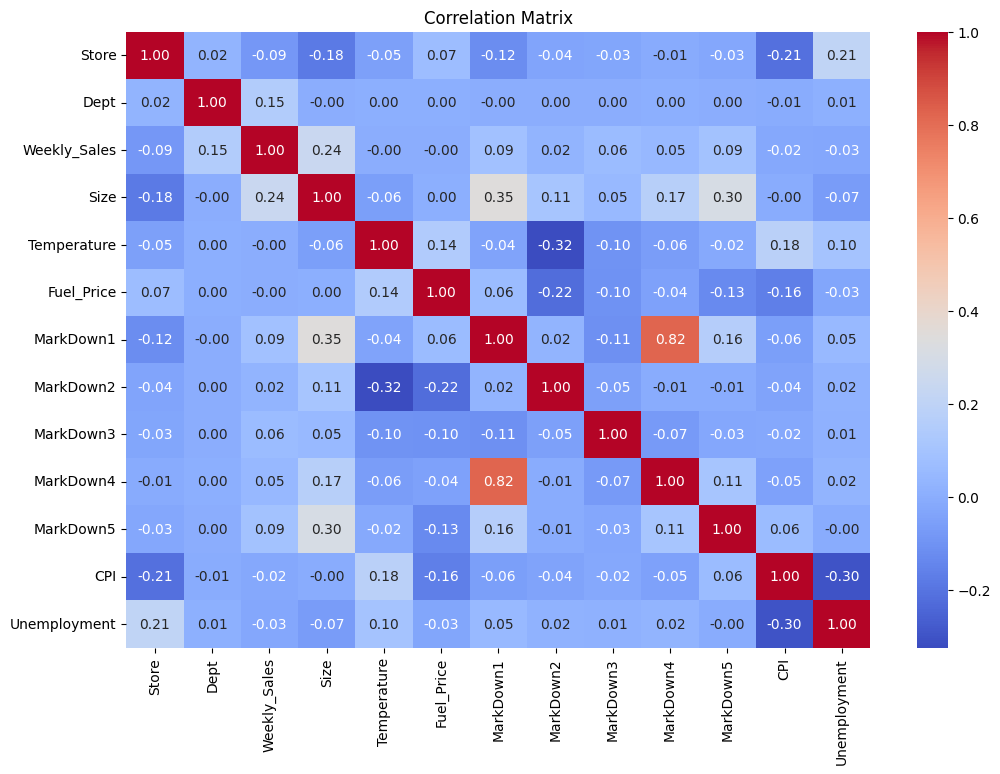

In [16]:
# เลือกมาเฉพาะคอลัมน์ที่เป็นตัวเลขสำหรับการคำนวณความสัมพันธ์
numeric_columns = train_merged.select_dtypes(include=[float, int])

# คำนวณความสัมพันธ์ระหว่างตัวแปร
correlation_matrix = numeric_columns.corr()

# แสดง heatmap ของความสัมพันธ์ระหว่างตัวแปร
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


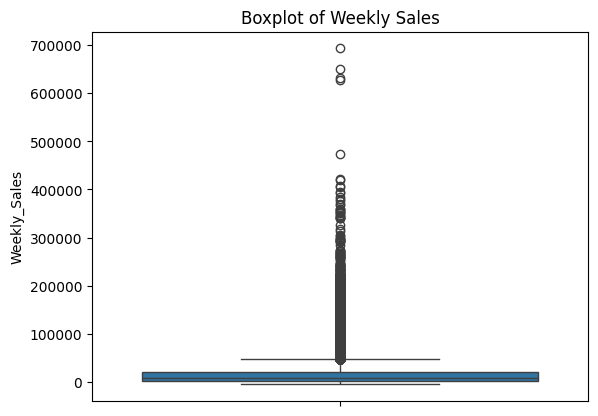

In [17]:
# การตรวจสอบค่าผิดปกติสำหรับยอดขายรายสัปดาห์
sns.boxplot(data=train_merged, y='Weekly_Sales')
plt.title('Boxplot of Weekly Sales')
plt.show()

In [18]:
# Handle missing values, outliers, and noises
# เติมค่าที่หายไปด้วยค่าเฉลี่ย (mean) หรือมัธยฐาน (median)
train_merged_fix = {train_merged['Temperature'].fillna(train_merged['Temperature'].mean(), inplace=True),
train_merged['Fuel_Price'].fillna(train_merged['Fuel_Price'].median(), inplace=True),
train_merged['MarkDown1'].fillna(train_merged['MarkDown1'].median(), inplace=True),
train_merged['MarkDown2'].fillna(train_merged['MarkDown2'].median(), inplace=True),
train_merged['MarkDown3'].fillna(train_merged['MarkDown3'].median(), inplace=True),
train_merged['MarkDown4'].fillna(train_merged['MarkDown4'].median(), inplace=True),
train_merged['MarkDown5'].fillna(train_merged['MarkDown5'].median(), inplace=True),
train_merged['CPI'].fillna(train_merged['CPI'].median(), inplace=True),
train_merged['Unemployment'].fillna(train_merged['Unemployment'].median(), inplace=True)}

<ipython-input-18-bdf7695eaf04>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_merged_fix = {train_merged['Temperature'].fillna(train_merged['Temperature'].mean(), inplace=True),
<ipython-input-18-bdf7695eaf04>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [19]:
print(train_merged.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [20]:
test_merged_fix = {test_merged['Temperature'].fillna(test_merged['Temperature'].mean(), inplace=True),
test_merged['MarkDown1'].fillna(test_merged['MarkDown1'].median(), inplace=True),
test_merged['MarkDown2'].fillna(test_merged['MarkDown2'].median(), inplace=True),
test_merged['MarkDown3'].fillna(test_merged['MarkDown3'].median(), inplace=True),
test_merged['MarkDown4'].fillna(test_merged['MarkDown4'].median(), inplace=True),
test_merged['CPI'].fillna(test_merged['CPI'].median(), inplace=True),
test_merged['Unemployment'].fillna(test_merged['Unemployment'].median(), inplace=True)}

<ipython-input-20-c7a2ebcf4206>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_merged_fix = {test_merged['Temperature'].fillna(test_merged['Temperature'].mean(), inplace=True),
<ipython-input-20-c7a2ebcf4206>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [21]:
print(test_merged.isnull().sum())

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [22]:
# Calculate the interquartile range (IQR)
Q1 = train_merged['Weekly_Sales'].quantile(0.25)
Q3 = train_merged['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ตรวจสอบค่าที่ถูกกำหนดว่าเป็น outliers
outliers = train_merged[(train_merged['Weekly_Sales'] < lower_bound) | (train_merged['Weekly_Sales'] > upper_bound)]
print(outliers)

        Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
8           1     1 2010-04-02      57258.43      False    A  151315   
46          1     1 2010-12-24      55931.23      False    A  151315   
63          1     1 2011-04-22      50510.31      False    A  151315   
106         1     1 2012-02-17      54060.10      False    A  151315   
113         1     1 2012-04-06      57592.12      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421285     45    95 2012-09-28      49380.11      False    B  118221   
421286     45    95 2012-10-05      50241.01      False    B  118221   
421287     45    95 2012-10-12      49334.77      False    B  118221   
421288     45    95 2012-10-19      48434.97      False    B  118221   
421289     45    95 2012-10-26      56017.47      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
8             62.27       2.719    5347.45     192.00   

In [23]:
# ใช้ Interquartile Range (IQR) เพื่อหาและลบค่าผิดปกติ
Q1 = train_merged['Weekly_Sales'].quantile(0.25)
Q3 = train_merged['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# กำหนดช่วงค่าที่ยอมรับได้
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ลบค่าผิดปกติออก
train_cleaned = train_merged[(train_merged['Weekly_Sales'] >= lower_bound) & (train_merged['Weekly_Sales'] <= upper_bound)]

# แสดงข้อมูลหลังจากลบค่าผิดปกติ
print(train_cleaned)

        Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-05      24924.50      False    A  151315   
1           1     1 2010-02-12      46039.49       True    A  151315   
2           1     1 2010-02-19      41595.55      False    A  151315   
3           1     1 2010-02-26      19403.54      False    A  151315   
4           1     1 2010-03-05      21827.90      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    98 2012-09-28        508.37      False    B  118221   
421566     45    98 2012-10-05        628.10      False    B  118221   
421567     45    98 2012-10-12       1061.02      False    B  118221   
421568     45    98 2012-10-19        760.01      False    B  118221   
421569     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572    5347.45     192.00   

In [24]:
# แสดงข้อมูลที่ทำการลบออก
print("Number of outliers removed:", len(train_merged) - len(train_cleaned))

Number of outliers removed: 35521


In [25]:
# ใช้ Moving Average เพื่อกรอง noise
train_cleaned['Weekly_Sales_MA'] = train_cleaned['Weekly_Sales'].rolling(window=4).mean()

# แสดงข้อมูลหลังจากกรอง noise
print(train_cleaned)

        Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-05      24924.50      False    A  151315   
1           1     1 2010-02-12      46039.49       True    A  151315   
2           1     1 2010-02-19      41595.55      False    A  151315   
3           1     1 2010-02-26      19403.54      False    A  151315   
4           1     1 2010-03-05      21827.90      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    98 2012-09-28        508.37      False    B  118221   
421566     45    98 2012-10-05        628.10      False    B  118221   
421567     45    98 2012-10-12       1061.02      False    B  118221   
421568     45    98 2012-10-19        760.01      False    B  118221   
421569     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572    5347.45     192.00   

<ipython-input-25-11bb8275f929>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['Weekly_Sales_MA'] = train_cleaned['Weekly_Sales'].rolling(window=4).mean()


In [26]:
# Perform feature engineering (optional)

# สมมติว่า train_cleaned เป็น DataFrame ของคุณ

# 1. สกัดปี, เดือน, วันจากคอลัมน์ Date
train_cleaned['Year'] = train_cleaned['Date'].dt.year
train_cleaned['Month'] = train_cleaned['Date'].dt.month
train_cleaned['Day'] = train_cleaned['Date'].dt.day
train_cleaned['Weekday'] = train_cleaned['Date'].dt.weekday  # 0=จันทร์, 6=อาทิตย์

# 2. ฟีเจอร์วันหยุด
train_cleaned['IsHoliday'] = train_cleaned['IsHoliday'].apply(lambda x: 1 if x else 0)

# 3. ฟีเจอร์ฤดูกาล
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

train_cleaned['Season'] = train_cleaned['Month'].apply(get_season)

# 4. ฟีเจอร์ยอดขายเฉลี่ยในเดือนก่อนหน้า
train_cleaned['Previous_Month_Avg_Sales'] = train_cleaned.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(4).rolling(window=4).mean()


<ipython-input-26-f723fab4b239>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['Year'] = train_cleaned['Date'].dt.year
<ipython-input-26-f723fab4b239>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['Month'] = train_cleaned['Date'].dt.month
<ipython-input-26-f723fab4b239>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [27]:
# 5. ตรวจสอบการสร้างฟีเจอร์ใหม่
print(train_cleaned.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50          0    A  151315        42.31   
1      1     1 2010-02-12      46039.49          1    A  151315        38.51   
2      1     1 2010-02-19      41595.55          0    A  151315        39.93   
3      1     1 2010-02-26      19403.54          0    A  151315        46.63   
4      1     1 2010-03-05      21827.90          0    A  151315        46.50   

   Fuel_Price  MarkDown1  ...  MarkDown5         CPI  Unemployment  \
0       2.572    5347.45  ...    3359.45  211.096358         8.106   
1       2.548    5347.45  ...    3359.45  211.242170         8.106   
2       2.514    5347.45  ...    3359.45  211.289143         8.106   
3       2.561    5347.45  ...    3359.45  211.319643         8.106   
4       2.625    5347.45  ...    3359.45  211.350143         8.106   

   Weekly_Sales_MA  Year  Month  Day  Weekday  Season  \
0              NaN  2010      2    5     

In [30]:
# prompt: จัดกาารข้อมูลของ test_merge

# เติมค่าที่หายไปด้วยค่าเฉลี่ย (mean) หรือมัธยฐาน (median)
test_merged_fix = {test_merged['Temperature'].fillna(test_merged['Temperature'].mean(), inplace=True),
test_merged['MarkDown1'].fillna(test_merged['MarkDown1'].median(), inplace=True),
test_merged['MarkDown2'].fillna(test_merged['MarkDown2'].median(), inplace=True),
test_merged['MarkDown3'].fillna(test_merged['MarkDown3'].median(), inplace=True),
test_merged['MarkDown4'].fillna(test_merged['MarkDown4'].median(), inplace=True),
test_merged['CPI'].fillna(test_merged['CPI'].median(), inplace=True),
test_merged['Unemployment'].fillna(test_merged['Unemployment'].median(), inplace=True)}
print(test_merged.isnull().sum())

# สกัดปี, เดือน, วันจากคอลัมน์ Date
test_merged['Year'] = test_merged['Date'].dt.year
test_merged['Month'] = test_merged['Date'].dt.month
test_merged['Day'] = test_merged['Date'].dt.day
test_merged['Weekday'] = test_merged['Date'].dt.weekday  # 0=จันทร์, 6=อาทิตย์

# ฟีเจอร์วันหยุด
test_merged['IsHoliday'] = test_merged['IsHoliday'].apply(lambda x: 1 if x else 0)

# ฟีเจอร์ฤดูกาล
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

test_merged['Season'] = test_merged['Month'].apply(get_season)

# ตรวจสอบการสร้างฟีเจอร์ใหม่
print(test_merged.head())


<ipython-input-30-f2b944d5fd0b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_merged_fix = {test_merged['Temperature'].fillna(test_merged['Temperature'].mean(), inplace=True),
<ipython-input-30-f2b944d5fd0b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
   Store  Dept       Date  IsHoliday Type    Size  Temperature  Fuel_Price  \
0      1     1 2012-11-02          0    A  151315        55.32       3.386   
1      1     1 2012-11-09          0    A  151315        61.24       3.314   
2      1     1 2012-11-16          0    A  151315        52.92       3.252   
3      1     1 2012-11-23          1    A  151315        56.23       3.211   
4      1     1 2012-11-30          0    A  151315        52.34       3.207   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0    6766.44    5147.70      50.82    3639.90    2737.42  223.462779   
1   11421.32    3370.89      40.28    4646.79    6154.16  223.481307   
2    9696.28     292.10     103.

In [80]:
X_test = test_merged.copy()

In [83]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  int64         
 4   Type          115064 non-null  object        
 5   Size          115064 non-null  int64         
 6   Temperature   115064 non-null  float64       
 7   Fuel_Price    115064 non-null  float64       
 8   MarkDown1     115064 non-null  float64       
 9   MarkDown2     115064 non-null  float64       
 10  MarkDown3     115064 non-null  float64       
 11  MarkDown4     115064 non-null  float64       
 12  MarkDown5     115064 non-null  float64       
 13  CPI           115064 non-null  float64       
 14  Unemployment  115064 non-null  float64       
 15  Year          115

In [81]:
# Identify numeric and categorical columns
numeric_cols = X_test.select_dtypes(include=['number']).columns
categorical_cols = X_test.select_dtypes(exclude=['number', 'datetime']).columns
datetime_cols = X_test.select_dtypes(include=['datetime64', 'datetimetz']).columns

# Separate the data into numeric, categorical, and datetime
X_test_numeric = X_test[numeric_cols]
X_test_categorical = X_test[categorical_cols]


## Explore Data

In [33]:
# Descriptive statistics
train_cleaned.describe()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales_MA,Year,Month,Day,Weekday,Previous_Month_Avg_Sales
count,386049.000000,386049.000000,386049,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000,...,386049.000000,386049.000000,386049.000000,386049.000000,386046.000000,386049.000000,386049.000000,386049.000000,386049.0,364311.000000
mean,22.418351,42.902909,2011-06-18 04:17:44.532222464,10544.403242,0.070051,133748.441149,60.062128,3.361214,5971.519327,998.248268,...,2061.817116,3771.376868,171.282755,7.971957,10544.346431,2010.969390,6.433489,15.694155,4.0,10552.764745
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,0.000000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,...,0.220000,135.160000,126.064000,3.879000,-989.500000,2010.000000,1.000000,1.000000,4.0,-989.500000
25%,11.000000,18.000000,2010-10-08 00:00:00,1755.830000,0.000000,93188.000000,46.660000,2.932000,5347.450000,192.000000,...,1481.310000,3359.450000,132.106200,6.885000,1853.207500,2010.000000,4.000000,8.000000,4.0,1868.632500
50%,22.000000,35.000000,2011-06-17 00:00:00,6373.100000,0.000000,128107.000000,62.070000,3.452000,5347.450000,192.000000,...,1481.310000,3359.450000,182.431557,7.866000,6522.561250,2011.000000,6.000000,16.000000,4.0,6546.530000
75%,33.000000,71.000000,2012-02-24 00:00:00,15802.090000,0.000000,202307.000000,74.250000,3.738000,5347.450000,192.000000,...,1481.310000,3359.450000,212.576205,8.595000,15941.871875,2012.000000,9.000000,23.000000,4.0,15975.491250
max,45.000000,99.000000,2012-10-26 00:00:00,47393.430000,1.000000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,...,67474.850000,108519.280000,227.232807,14.313000,47152.567500,2012.000000,12.000000,31.000000,4.0,47152.567500
std,12.791236,29.604673,NaN,11327.026575,0.255233,60976.982207,18.493405,0.459029,4969.092478,4928.090531,...,3601.149883,3534.203113,39.170721,1.876819,11113.876561,0.796899,3.236601,8.756171,0.0,11094.956664


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


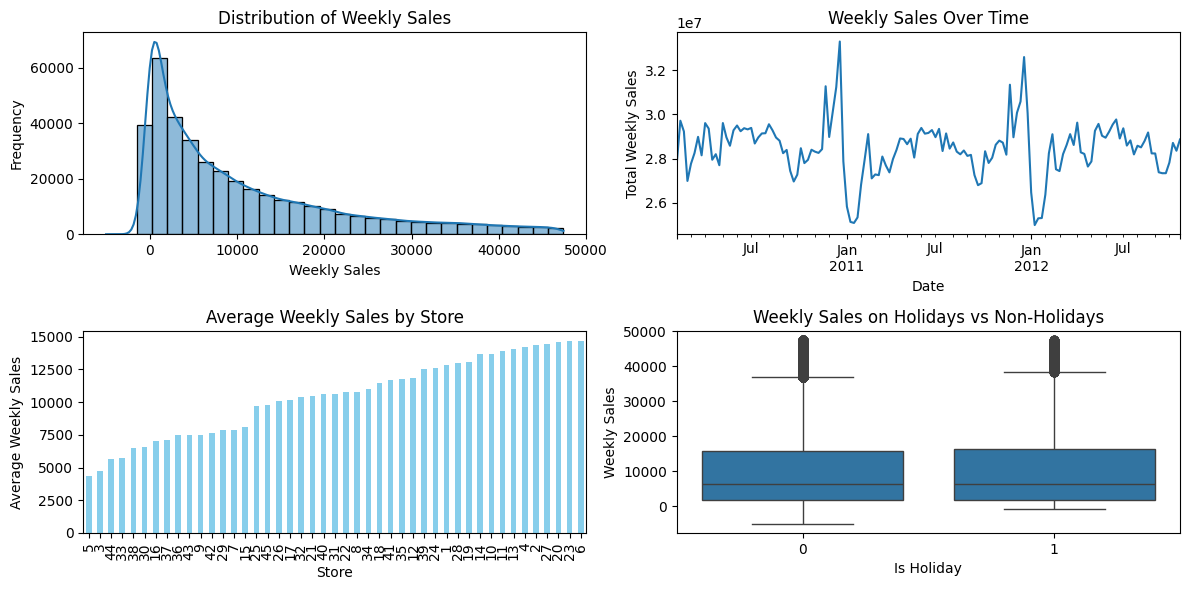

In [34]:
# Data visualization

# กำหนดขนาดของกราฟ
plt.figure(figsize=(12, 6))

# 1. Histogram ของยอดขาย
plt.subplot(2, 2, 1)
sns.histplot(train_cleaned['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')

# 2. Line Plot แสดงแนวโน้มยอดขายรายสัปดาห์ตามเวลา
plt.subplot(2, 2, 2)
train_cleaned.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')

# 3. Bar Plot เปรียบเทียบยอดขายระหว่างร้านค้า
plt.subplot(2, 2, 3)
store_sales = train_cleaned.groupby('Store')['Weekly_Sales'].mean().sort_values()
store_sales.plot(kind='bar', color='skyblue')
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')

# 4. Box Plot เปรียบเทียบยอดขายในวันหยุดและไม่ใช่วันหยุด
plt.subplot(2, 2, 4)
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train_cleaned)
plt.title('Weekly Sales on Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')

plt.tight_layout()
plt.show()


In [35]:
# Create a copy of train_cleaned to avoid modifying the original DataFrame
train_encoded = train_cleaned.copy()

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns - replace with your actual categorical columns
categorical_cols = ['Store', 'Dept', 'IsHoliday']

# Encode categorical features using Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train_encoded[col])

# Identify and encode any other columns with string data types.
# Loop through all columns in the DataFrame
for col in train_encoded.select_dtypes(include=['object']).columns:
    # If the column is not already in categorical_cols (to prevent re-encoding)
    if col not in categorical_cols and col != 'Weekly_Sales':  # Exclude 'Weekly_Sales'
        # Create a LabelEncoder instance for this column
        le = LabelEncoder()
        # Fit and transform the column using Label Encoding
        train_encoded[col] = le.fit_transform(train_encoded[col])

# Now you can proceed with the correlation analysis
correlation_with_target = train_encoded.corr()['Weekly_Sales'].sort_values(ascending=False)

# แสดง Correlation
print("Correlation with Weekly_Sales:")
print(correlation_with_target)

Correlation with Weekly_Sales:
Weekly_Sales                1.000000
Weekly_Sales_MA             0.976490
Previous_Month_Avg_Sales    0.945360
Size                        0.217761
MarkDown1                   0.048535
MarkDown5                   0.046208
MarkDown4                   0.025219
Month                       0.022437
MarkDown3                   0.019702
MarkDown2                   0.017817
Fuel_Price                  0.006217
IsHoliday                   0.005455
Season                      0.005358
Day                        -0.000787
Temperature                -0.001637
Date                       -0.005736
Unemployment               -0.008419
Year                       -0.013245
Dept                       -0.037577
CPI                        -0.038119
Store                      -0.054869
Type                       -0.159731
Weekday                          NaN
Name: Weekly_Sales, dtype: float64


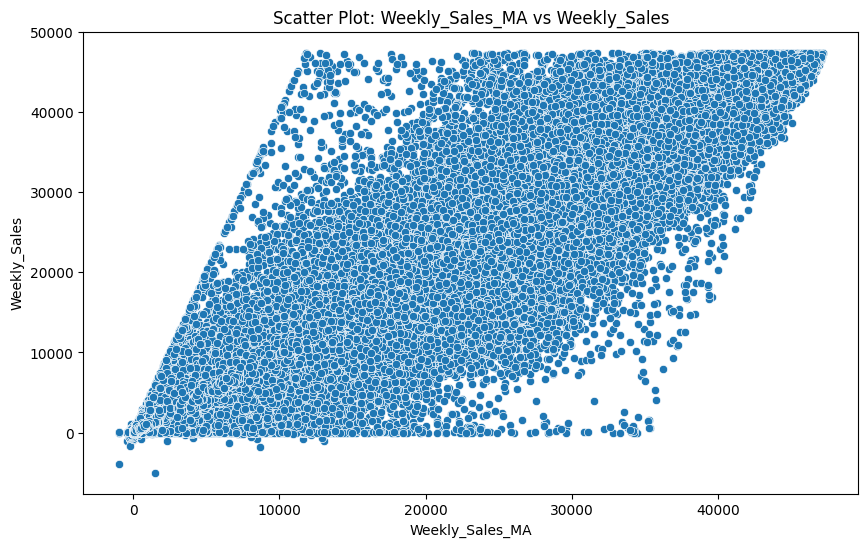

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


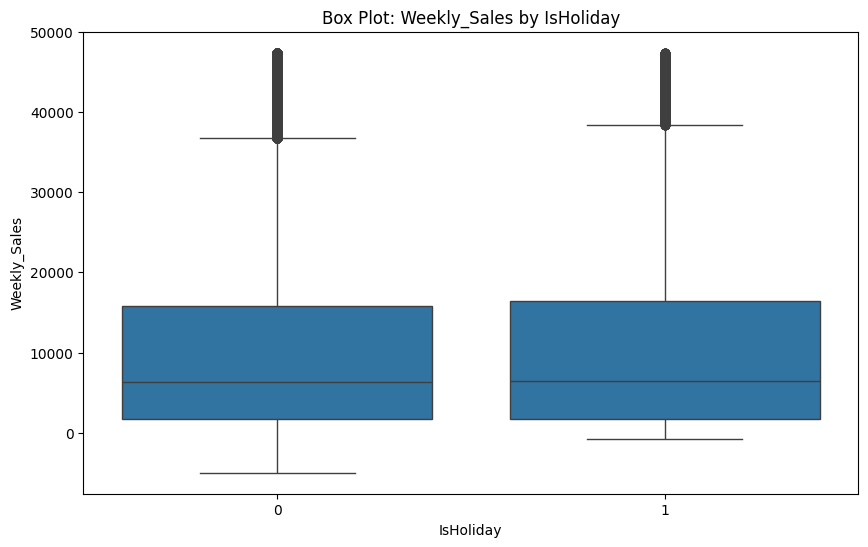

In [36]:
# Target variable analysis: examine how each feature correlates with or impacts the target/interested variable
# คำนวณ Correlation Matrix สำหรับฟีเจอร์ต่าง ๆ กับ Weekly_Sales
correlation_with_target = train_encoded.corr()['Weekly_Sales'].sort_values(ascending=False)

# แสดง Scatter Plot สำหรับฟีเจอร์ที่มีความสัมพันธ์สูงสุด
top_feature = correlation_with_target.index[1]  # ตัวแปรที่มีความสัมพันธ์สูงสุดหลังจาก Weekly_Sales

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_encoded, x=top_feature, y='Weekly_Sales')
plt.title(f'Scatter Plot: {top_feature} vs Weekly_Sales')
plt.xlabel(top_feature)
plt.ylabel('Weekly_Sales')
plt.show()

# แสดง Box Plot สำหรับ IsHoliday
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train_encoded)
plt.title('Box Plot: Weekly_Sales by IsHoliday')
plt.xlabel('IsHoliday')
plt.ylabel('Weekly_Sales')
plt.show()


## Data Modeling

In [37]:
# prompt: แบ่งข้อมูล train เป็น X_train กับ Y_train จากไฟล์ train_encoded และแบ่งข้อมูล test เป็น X_test จากไฟล์ test_merged

# Assuming train_encoded and test_merged are your DataFrames

# Define features (X) and target (Y) for the training data
X_train = train_encoded.drop('Weekly_Sales', axis=1)
Y_train = train_encoded['Weekly_Sales']

# Define features (X) for the testing data
X_test = test_merged.copy()  # Assuming you want to use all columns from test_merged as features

# Print the shapes of the training and testing datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


Shape of X_train: (386049, 22)
Shape of Y_train: (386049,)
Shape of X_test: (115064, 20)


In [91]:
# prompt: แบ่งเทรนเทส จาก train_encoded

from sklearn.model_selection import train_test_split

# Assuming 'train_encoded' is your DataFrame with features and target variable
X = train_encoded.drop('Weekly_Sales', axis=1)  # Features
y = train_encoded['Weekly_Sales']  # Target variable

# Split data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")


Shape of X_train: (308839, 22)
Shape of X_val: (77210, 22)
Shape of y_train: (308839,)
Shape of y_val: (77210,)


In [85]:
# prompt: ดูค่า null ของ X_train

print(X_train.isnull().sum())


Store                           0
Dept                            0
Date                            0
IsHoliday                       0
Type                            0
Size                            0
Temperature                     0
Fuel_Price                      0
MarkDown1                       0
MarkDown2                       0
MarkDown3                       0
MarkDown4                       0
MarkDown5                       0
CPI                             0
Unemployment                    0
Weekly_Sales_MA                 2
Year                            0
Month                           0
Day                             0
Weekday                         0
Season                          0
Previous_Month_Avg_Sales    17419
dtype: int64


In [87]:
X_val

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown5,CPI,Unemployment,Weekly_Sales_MA,Year,Month,Day,Weekday,Season,Previous_Month_Avg_Sales
84015,8,39,2012-01-13,0,1,125833,42.44,3.261,4731.10,2959.36,...,3416.48,223.616805,5.667,1218.9075,2012,1,13,4,3,1844.6100
365650,38,32,2012-04-06,0,0,184109,73.49,3.891,9057.89,192.00,...,15694.32,220.120412,6.989,18936.1950,2012,4,6,4,1,16569.3325
51094,5,16,2010-08-20,0,0,202505,87.36,2.664,5347.45,192.00,...,3359.45,213.129143,6.973,14.9050,2010,8,20,4,2,217.9775
40558,4,5,2011-02-11,1,1,34875,38.25,3.022,5347.45,192.00,...,3359.45,213.494463,6.634,750.5750,2011,2,11,4,3,2149.1150
307949,31,28,2012-06-22,0,0,203007,74.85,3.735,7803.30,609.25,...,15323.92,197.738934,8.090,2806.1050,2012,6,22,4,2,2799.9350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305943,31,14,2011-12-02,0,0,203007,33.80,3.378,5261.51,65.00,...,25961.21,195.822329,8.513,2980.7750,2011,12,2,4,3,5251.9750
86055,8,64,2011-07-15,0,1,125833,90.45,3.575,5347.45,192.00,...,3359.45,218.960724,6.404,12181.1375,2011,7,15,4,2,12770.5175
295063,30,9,2011-06-24,0,0,203750,85.72,3.594,5347.45,192.00,...,3359.45,214.744111,7.931,21996.4600,2011,6,24,4,2,18411.7200
372538,39,11,2010-04-16,0,0,155083,43.30,2.885,5347.45,192.00,...,3359.45,131.980900,5.435,4252.5775,2010,4,16,4,1,4175.7925


In [41]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [93]:
# prompt: Create a Linear Regression model

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, Y_train)



DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [94]:
# Create a Linear Regression model
model = LinearRegression()

# Assuming 'train_encoded' is your DataFrame with features and target variable
X = train_encoded.drop('Weekly_Sales', axis=1)  # Features
y = train_encoded['Weekly_Sales']  # Target variable

# Split data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean of the column for numeric columns
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data only
imputer.fit(X_train[numeric_cols])  # Use only numeric columns for fitting

# Transform training, validation, and test data using the fitted imputer
X_train_imputed = imputer.transform(X_train_split[numeric_cols])
X_val_imputed = imputer.transform(X_val_split[numeric_cols])
X_test_imputed = imputer.transform(X_test[numeric_cols])  # Use same numeric columns for test


KeyError: "['Date_Numeric'] not in index"

In [96]:
# Create a Linear Regression model
model = LinearRegression()

# Assuming 'train_encoded' is your DataFrame with features and target variable
X = train_encoded.drop('Weekly_Sales', axis=1)  # Features
y = train_encoded['Weekly_Sales']  # Target variable

# Split data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Make sure 'numeric_cols' only includes columns actually present in X_train
numeric_cols = [col for col in numeric_cols if col in X_train.columns]

# Impute missing values with the mean of the column for numeric columns
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data only, using only numeric columns
imputer.fit(X_train[numeric_cols])  # Correctly apply to X_train

# Transform training, validation, and test data using the fitted imputer
X_train_imputed = imputer.transform(X_train[numeric_cols])
X_val_imputed = imputer.transform(X_val[numeric_cols])
X_test_imputed = imputer.transform(X_test[numeric_cols])  # Assuming X_test is defined and contains numeric_cols

In [97]:
# Handle categorical columns
X_train_categorical = pd.get_dummies(X_train_split[categorical_cols], drop_first=True)
X_val_categorical = pd.get_dummies(X_val_split[categorical_cols], drop_first=True)
X_test_categorical = pd.get_dummies(X_test[categorical_cols], drop_first=True)

# Align the categorical columns (in case there are different categories in train/test)
X_test_categorical = X_test_categorical.reindex(columns=X_train_categorical.columns, fill_value=0)


In [98]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Import metrics functions
from sklearn.metrics import mean_squared_error, r2_score # Added import for mean_squared_error and r2_score


In [99]:
# prompt: Test Linear Regression Model

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_imputed, Y_train_split)

# Make predictions on the validation data
Y_pred_val = model.predict(X_val_imputed)

# Evaluate the model on the validation data
mse_val = mean_squared_error(Y_val_split, Y_pred_val)
r2_val = r2_score(Y_val_split, Y_pred_val)

print("Validation Data:")
print(f"Mean Squared Error (MSE): {mse_val}")
print(f"R-squared (R2): {r2_val}")

# Make predictions on the test data
Y_pred_test = model.predict(X_test_imputed)

# You can now use Y_pred_test for further analysis or submission.
print(Y_pred_test)


Validation Data:
Mean Squared Error (MSE): 121943760.19035836
R-squared (R2): 0.05413280947770005
[11583.01221495 11767.26101992 11631.3955052  ...  7912.08479151
  7923.44679821  7842.94702556]


In [99]:
# prompt: แยกวันที่ออกเป็นหลายคอลัมน์ ของ เทรกับเทส

# แยกวันที่ออกเป็นหลายคอลัมน์สำหรับ train_cleaned
train_cleaned['Year'] = train_cleaned['Date'].dt.year
train_cleaned['Month'] = train_cleaned['Date'].dt.month
train_cleaned['Day'] = train_cleaned['Date'].dt.day
train_cleaned['Weekday'] = train_cleaned['Date'].dt.weekday

# แยกวันที่ออกเป็นหลายคอลัมน์สำหรับ test_merged
test_merged['Year'] = test_merged['Date'].dt.year
test_merged['Month'] = test_merged['Date'].dt.month
test_merged['Day'] = test_merged['Date'].dt.day
test_merged['Weekday'] = test_merged['Date'].dt.weekday


In [100]:
# แยกวันที่ออกเป็นหลายคอลัมน์
X_train['Year'] = X_train['Date'].dt.year
X_train['Month'] = X_train['Date'].dt.month
X_train['Day'] = X_train['Date'].dt.day

X_val['Year'] = X_val['Date'].dt.year
X_val['Month'] = X_val['Date'].dt.month
X_val['Day'] = X_val['Date'].dt.day

In [101]:
# ลบคอลัมน์วันที่
X_train = X_train.drop(columns=['Date'])
X_val = X_val.drop(columns=['Date'])

In [105]:
from sklearn.ensemble import HistGradientBoostingRegressor

# สร้างโมเดลที่จัดการกับ NaN ได้
hist_model = HistGradientBoostingRegressor()
hist_model.fit(X_train,y_train)
hist_predictions = hist_model.predict(X_val)

# ประเมินผล
mse = mean_squared_error(y_val, hist_predictions)
r2 = r2_score(y_val, hist_predictions)
print("HistGradientBoosting MSE:", mse)
print("HistGradientBoosting R2:", r2)

HistGradientBoosting MSE: 3959241.4750581016
HistGradientBoosting R2: 0.9692898053597279


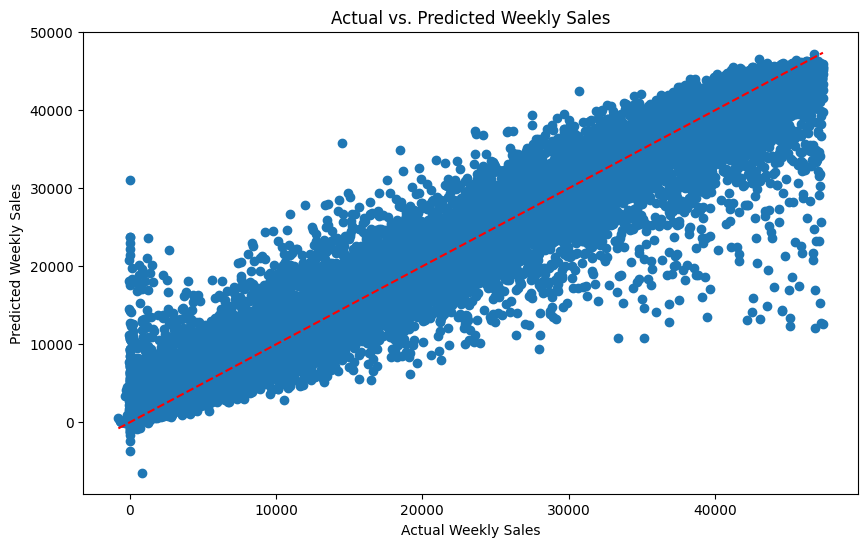

In [106]:
# prompt: วาดกราฟการคาดการณ์และค่าจริงเพื่อดูการกระจายของข้อมูลและความถูกต้องของการคาดการณ์

plt.figure(figsize=(10, 6))
plt.scatter(y_val, hist_predictions)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs. Predicted Weekly Sales")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.show()


In [109]:
# prompt: สร้าง DataFrame ใหม่เพื่อแสดงค่าจริงและค่าทำนายร่วมกันเพื่อดูความแม่นยำของโมเดล

# สร้าง DataFrame ใหม่เพื่อแสดงค่าจริงและค่าทำนายร่วมกัน
comparison_df = pd.DataFrame({'Actual_Weekly_Sales': y_val, 'Predicted_Weekly_Sales': hist_predictions})

# แสดง DataFrame
comparison_df


,Actual_Weekly_Sales,Predicted_Weekly_Sales
84015,312.94,792.255544
365650,22139.63,20408.542066
51094,44.00,72.029643
40558,808.10,750.940014
307949,2755.86,2839.093576
...,...,...
305943,2465.10,2759.498705
86055,12054.88,11833.175365
295063,21405.95,21760.596050
372538,4283.49,4288.462399


In [120]:
# คำนวณความแตกต่างระหว่างค่าจริงและค่าทำนาย
comparison_df['Difference'] = comparison_df['Actual_Weekly_Sales'] - comparison_df['Predicted_Weekly_Sales']

# แสดง DataFrame ที่ปรับปรุงแล้ว
print(comparison_df.head())

        Actual_Weekly_Sales  Predicted_Weekly_Sales   Difference
84015                312.94              792.255544  -479.315544
365650             22139.63            20408.542066  1731.087934
51094                 44.00               72.029643   -28.029643
40558                808.10              750.940014    57.159986
307949              2755.86             2839.093576   -83.233576


In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(comparison_df['Actual_Weekly_Sales'], comparison_df['Predicted_Weekly_Sales'])
mae = mean_absolute_error(comparison_df['Actual_Weekly_Sales'], comparison_df['Predicted_Weekly_Sales'])

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 3959241.4750581016
Mean Absolute Error (MAE): 987.3466957582673


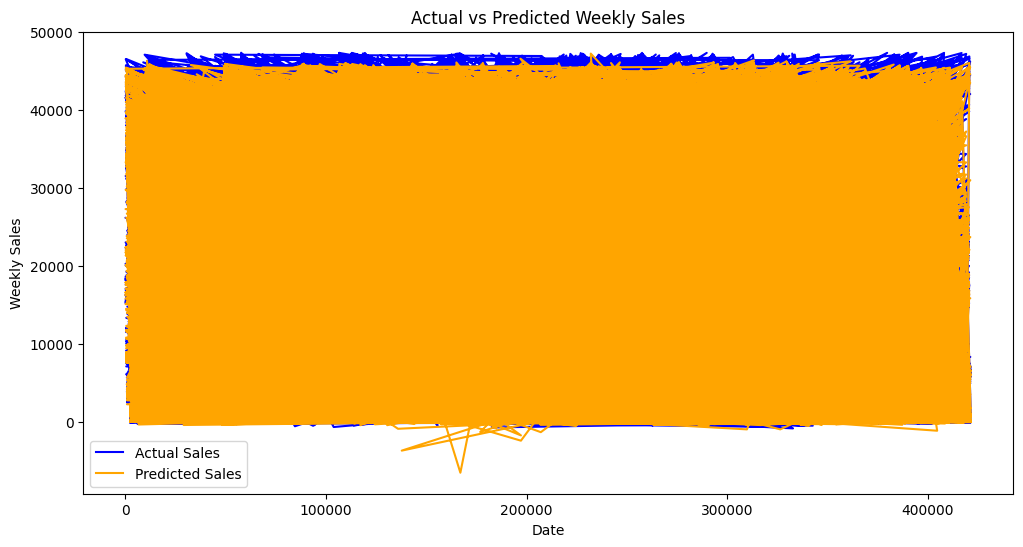

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual_Weekly_Sales'], label='Actual Sales', color='blue')
plt.plot(comparison_df.index, comparison_df['Predicted_Weekly_Sales'], label='Predicted Sales', color='orange')
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

#### สรุปผลที่ได้
1. **วันหยุด (IsHoliday)**: ยอดขายรายสัปดาห์มีแนวโน้มที่จะสูงขึ้นในช่วงวันหยุด เนื่องจากผู้บริโภคมักจะใช้จ่ายมากขึ้นในช่วงเวลานี้ ซึ่งรวมถึงวันหยุดสุดสัปดาห์ วันขอบคุณพระเจ้า และเทศกาลต่างๆ
  
2. **ขนาดของร้านค้า (Type)**: ร้านค้าขนาดใหญ่ (ประเภท A) มักมียอดขายสูงกว่าร้านค้าขนาดเล็ก (ประเภท B และ C) เนื่องจากร้านค้าขนาดใหญ่มีสินค้าหลากหลายและมีลูกค้าเข้ามาเยอะกว่า

3. **การลดราคา (MarkDown)**: การมีส่วนลดมีแนวโน้มที่จะส่งผลให้ยอดขายรายสัปดาห์สูงขึ้น เนื่องจากลูกค้าจะมีแนวโน้มซื้อสินค้ามากขึ้นเมื่อมีโปรโมชั่นหรือส่วนลด

### ตอบคำถาม

1. **ยอดขายรายสัปดาห์จะสูงขึ้นอย่างมากในช่วงสัปดาห์วันหยุด เมื่อเทียบกับสัปดาห์ที่ไม่ใช่วันหยุด**
   - **ตอบ: ถูก**  
   - **เหตุผล**: จากการวิเคราะห์พบว่าช่วงวันหยุดมียอดขายสูงกว่าสัปดาห์ปกติ ซึ่งเป็นผลจากการใช้จ่ายที่เพิ่มขึ้นในช่วงนี้

2. **ร้านค้าขนาดใหญ่ (ประเภท A) มีแนวโน้มที่จะมียอดขายรายสัปดาห์สูงกว่าร้านค้าขนาดเล็ก (ประเภท B และ C)**
   - **ตอบ: ถูก**  
   - **เหตุผล**: การวิเคราะห์แสดงให้เห็นว่าร้านค้าประเภท A มีความสามารถในการดึงดูดลูกค้าได้มากกว่า และมีสินค้ามากมายซึ่งส่งผลต่อยอดขายที่สูงกว่า

3. **การมีอยู่ของการลดราคา (ส่วนลด) ส่งผลให้ยอดขายรายสัปดาห์สูงขึ้น**
   - **ตอบ: ถูก**  
   - **เหตุผล**: การวิเคราะห์พบว่าการมีส่วนลดกระตุ้นให้ลูกค้าซื้อสินค้าเพิ่มขึ้น ส่งผลให้ยอดขายสูงขึ้นในช่วงที่มีการลดราคา

### สรุป

โดยรวมแล้ว ปัจจัยที่ส่งผลต่อยอดขายรายสัปดาห์ในร้านค้าคือวันหยุด ขนาดของร้านค้า และการมีส่วนลด ทั้งหมดนี้เป็นข้อมูลที่สำคัญในการวางแผนกลยุทธ์การขายและการตลาดในอนาคต

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab / GitHub ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * Data Description: อธิบายข้อมูลที่ใช้
    * Data Preparation: การเตรียมข้อมูลก่อนวิเคราะห์
    * Motivation: ปัญหาหรือคำถามที่ตั้ง ทำไมถึงสนใจที่จะทำงานในเรื่องนี้
    * Communicating Results (with figure, table, etc.): ผลที่ได้จากการศึกษา โดยระบุแนวทางที่ใช้ที่ทำให้เกิดผลลัพธ์ดังกล่าวด้วย
        โดยไม่ต้องนำเสนอ source code ผลประกอบด้วย 2 ส่วนสำคัญ จาก
        * Conjectures >= 3 ข้อ
        * Machine learning models
    * Conclusion: สรุปผลที่ได้จากการวิเคราะห์ข้อมูล
** Note: แต่ละกลุ่มส่งแต่ละไฟล์ครั้งเดียว **
---------------------